TODO: 
    - Find actual locations on SOGS
    - How do we examine the OTE-03 focus image
    - Make sure deployment -> large image array functions work
    - Get OTE-04 data
    - figure out info_dict vs info_dictionary vs info_df flow
    - add distance to target center in info_dict/dictionary
    
    

# Early OTE Commissioning Guiding PSF Analysis

During the five OTE-CARs that precede LOS-02, the WF Guiding team will do periodic checks of the PSFs and determine if there are any concerns for guiding in LOS-02. This notebook will walk through OTE-01, OTE-02, OTE-03, OTE-04, and OTE-06 analysis. We do not expect analysis of OTE-05 to be necessary. We focus on PSF shapes and how many "guideable" segment PSFs we have at each stage. 

As each step is completed, please communicate a summary of what you have found to WF Ops via email or over the loops during a non-busy time in commissioning. 

*It is very important to provide WF Ops with an update if you think the number of "guidable" segment PSFs is less than 6 prior to OTE-03.*

# Table of Contents
1. [Overview of products from Shadow](#Overview-of-the-products-we-can-expect-from-Shadow-and-others)
2. [Overview of each CAR](#Overview-of-each-CAR) 
3. [After OTE-01](#After-OTE-01)
4. [After OTE-02](#After-OTE-02)
5. [After OTE-03](#After-OTE-03)
6. [After OTE-04](#After-OTE-04)
7. [After OTE-06](#After-OTE-06)

In [131]:
import os
from glob import glob
import warnings

from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import from_levels_and_colors
from matplotlib import cm
import numpy as np
import pandas as pd

import notebook_utils
from notebook_utils import SEGMENTS, GA_PSF_LOCATIONS
from jwst_magic import convert_image

font = {'size'   : 16}

matplotlib.rc('font', **font)

%matplotlib inline

# Overview of the products we can expect from Shadow and others 

### What you will expect to have from WSS Shadow
1. Path to the mosaic
2. Txt file that includes: 
    - `ra_txt`: RA in HH:MM:SS
    - `dec_txt`: Dec in HH:MM:SS
    - `equinox`: 
    - `x`: X location of the peak pixel in the PSF in the mosaic image
    - `y`: Y location of the peak pixel in the PSF in the mosaic image
    - `fwhm`: The overall measure of FWHM of a PSF
    - `fwhm_x`: FWHM of the PSF in the X direction
    - `fwhm_y`: FWHM of the PSF in the Y direction
    - `starsize`: The average FWHM in arcseconds
    - `ellipse`: (min(fwhm_x, fwhm_y)/max(fwhm_x, fwhm_y))Values from 0 - 1 where 0 is more elliptical, and 1 is more circular
    - `background`: Median value of the image
    - `skylevel`: Estimated sky level in the image
    - `brightness`: Average peak value of the PSF
    - `time_local`: Local time of observation
    - `time_ut`: UTC time of observation 
    - `ra_deg`: RA in degrees
    - `dec_deg`: Dec in degrees
3. A general idea of the location of the target star in the mosaic image

# Overview of each CAR

## OTE-01: Initial Image Mosiac

OTE-01 is the initial image mosaic and its goal is to find the 18 segments. 

There will be a range of focus for the PSFs, some will be close to focus, some will be out of focus. This will cause several of the segment PSFs to be saturated because, by requirement, the target star should be very bright and isolated. If a PSF is not saturated, it likely has a large defocus. The closer to focus, more saturation is expected. 

After finding the segments we define an initial offset given by a rough estimate of the center of the PMSA deployment. We can inspect the shape of the PSFs by looking at the fainter background stars. 

We will have some idea of the shape of the PSF but no idea of any of the segments' identifications. 

**Note: WSS Shadow downsamples the detector images for the mosaic** but we do have the normal DMS images, so Shadow can give you the name of the DMS file that has the segments for a not downsampled option.

#### Shadow will provide:
 - End of OTE-01 mosaic path (will be available in the `/data/...` directory in SOGS)
 - Associated pick_log.txt file from QUIP **if time allows**

[Go to OTE-01 analysis section](#After-OTE-01)

## OTE-02: Alignment Matrix 1

WSS/WSS Shadow will use the OTE-01 initial mosaic offset from the expected target to do the first telescope correction for OTE-02, so that it points roughy to the center of the initial deployment. 

For OTE-02 we have NIRCam ALL images, so we should have a partial view of the initial deployment (not mosaic) but these should have few, if any, saturated PSFs. Saturation in any of the PSFs will imply that the defocus is too large between all segments)]. 

The process for OTE-01 and OTE-02  for WF Guiding will be the same. Both OTE-01 and OTE-02 images are expected to have high backgrounds.

#### Shadow will provide:
 - End of OTE-02 NRCALL path (will be available in the `/data/...` directory in SOGS)
 - Associated pick_log.txt file from QUIP **if time allows**
 - Any information from any discussions regarding PSF quality dicussed in the WF office **if time allows**

[Go to OTE-02 analysis section](#After-OTE-02)

## OTE-03: Secondary Mirror Focus Sweep 

**0TE-03 is optional, but likely to occur.** 

During OTE-03, the secondary mirror will be moved 100um in either direction in order to find the best focus for the segment PSFs that are visible in the field.

We will have the NRCALL exposure, as with OTE-02, with as many segments in the field as possible. At the end of OTE-03 we might have a tentative segment ID and should have better (or more compact) PSFs for guiding.

WF Guiding should have recieved a DAN regarding any OTE-03 data.

#### Shadow will provide:
 - pick_log.txt from QUIP, completed on the last image **if time allows**
 - Any idea regarding which segment PSF is which. There will be a formal list somewhere, in a PNG (will be avilable on a pring out or in `/data/…`)

[Go to OTE-03 analysis section](#After-OTE-03)

## OTE-04: Segment ID

At the end of OTE-04 we should have the ID of each segment, with images of all the segment PSFs. The only caveat is that some segments may be on top or close to each other, thus, some contamination could affect the PSF measurements.

As this point, WF Guiding should be able to make a fake large image array image that can be run through MAGIC and DHAS. All successful guide/reference star configurations, should be recorded.

#### Shadow will provide:
 - Which segment is which in either an OTE-04 image printout or online. Format and communication is unclear (will be avilable on a print out or in `/data/…`)


[Go to OTE-04 analysis section](#After-OTE-04)

## OTE-05: Alignment Matrix 2

OTE-05 is similar to OTE-02.

We do not expect to have any new information from OTE-05 that can help WF Guiding prepare for LOS-02, so no analysis will be done. 

## OTE-06: Segment Image Array 1

During OTE-06, WSS forms the large array in NIRCam A3. At the end of OTE-06 we'll have the same configuration and PSF as in LOS-02 and the first exposure of OTE-07. This is also a good time to do a full PSF characterization in preparation for Guiding.

#### Shadow will provide:
 - pick_log.txt from QUIP, completed on the last image **if time allows**


[Go to OTE-06 analysis section](#After-OTE-06)

# After OTE 01 

<font color='Tomato'> <div><center>  
## Make sure the following parameters are correct
</center></div></font>

In [2]:
# CAR information
car = 'OTE-01'
program_id = 1134

In [12]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/' #/data/jwst/wss/flight/

# Path to the OTE-01 mosaic
ote01_mosaic = os.path.join(main_directory, f'{car}/mosaic0_obs1-2_median_sub_gbrady_05032021.fits')#'OTE-01/Ball_Deployment-2/WARM/output/mosaic0_quip.fits')

# Location of the file exported from QUIP
# If no file is provided, set variable equal to None
ote01_info_from_shadow = '/Users/kbrooks/Desktop/pick_log.txt' # None

# Define location of the target in the image
# If no location is provided, set variable equal to None
ote01_target_location = None #(4000, 6000)

<font color='DodgerBlue'> <div><center>  
## Run the following cells without changing them   
</center></div></font>

In [13]:
# Open image
ote01_image = fits.getdata(ote01_mosaic)

# Correct negative pixels
ote01_image = notebook_utils.correct_pixel_values(ote01_image)

In [59]:
# Get PSF characteristics
parameters_to_include = ['x', 'y', 'fwhm', 'fwhm_x', 'fwhm_y', 'ellipse']

ote01_df, \
ote01_target_location = notebook_utils.get_image_information(ote01_image, 
                                                             ote01_info_from_shadow, 
                                                             parameters_to_include, 
                                                             ote01_target_location, 
                                                             smoothing='high')

#ote01_dictionary = convert_df_to_dictionary(ote01_df)

ote01_df

Creating the information table from /Users/kbrooks/Desktop/pick_log.txt


x            y       fwhm     fwhm_x     fwhm_y   ellipse  \
0   3183.122917  6682.173009  17.486145   7.064045  23.698730  0.298077   
1   3734.581458  6548.935658   8.621786   9.454321   7.699754  0.814416   
2   3699.249464  6281.197796  14.495469  13.376130  15.534361  0.861067   
3   4008.829903  6889.956856  12.208638  15.344006   7.916006  0.515902   
4   4598.353512  6856.156425  12.127656  14.670776   8.884167  0.605569   
5   4846.137409  6160.521621  13.314526  13.602824  13.019846  0.957143   
6   4173.948920  5768.065227  20.724278  24.147565  16.609832  0.687847   
7   4183.948593  5631.367309  12.303161   6.628720  16.087126  0.412051   
8   4462.618462  6234.218139  21.980427  20.928984  22.983820  0.910596   
9   4430.374239  6149.924094  23.889754  23.315321  24.450695  0.953565   
10  4429.241232  6404.345895  19.193742  13.952590  23.283571  0.599246   

    distance_to_target  
0          1077.355078  
1           522.368362  
2           483.750577  
3           633.374829  
4           709.452925  
5           673.992776  
6           513.014623  
7           649.633384  
8           283.504898  
9           279.955188  
10          275.406888

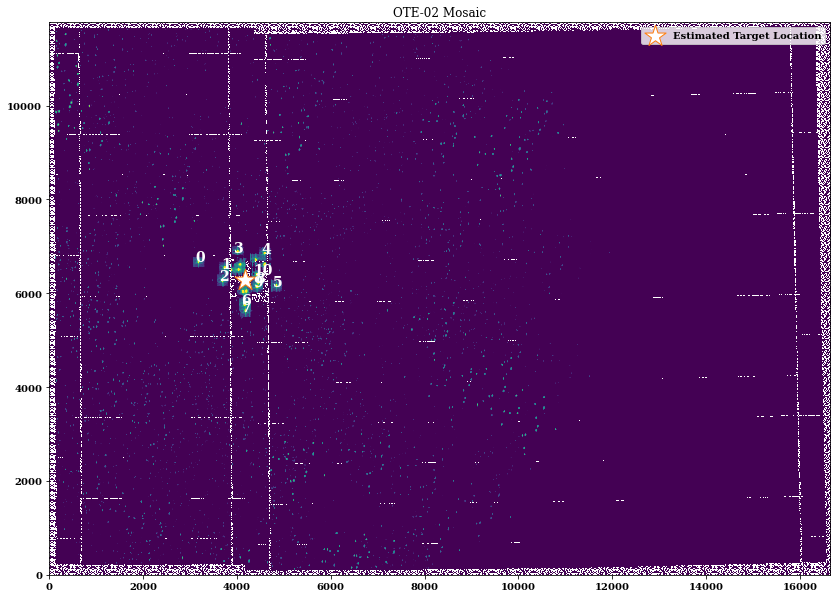

In [60]:
# Plot the full mosaic with the estimated target location and identified PSFs
notebook_utils.plot_mosaic_with_psfs(ote01_image, 
                                     car, 
                                     ote01_df['x'].values, 
                                     ote01_df['y'].values, 
                                     ote01_target_location, 
                                     xlim=None, 
                                     ylim=None
                                    )

<font color='Tomato'> <div><center> 
## Update the next cell (only) as needed 
</center></div></font>

In [24]:
# Update the xlim and ylim values to zoom in on the set of PSFs of interest

xlim = (2500, 5500)
ylim = (5000, 7500)


<font color='DodgerBlue'> <div><center>  
## Run the following cells without changing them   
</center></div></font>

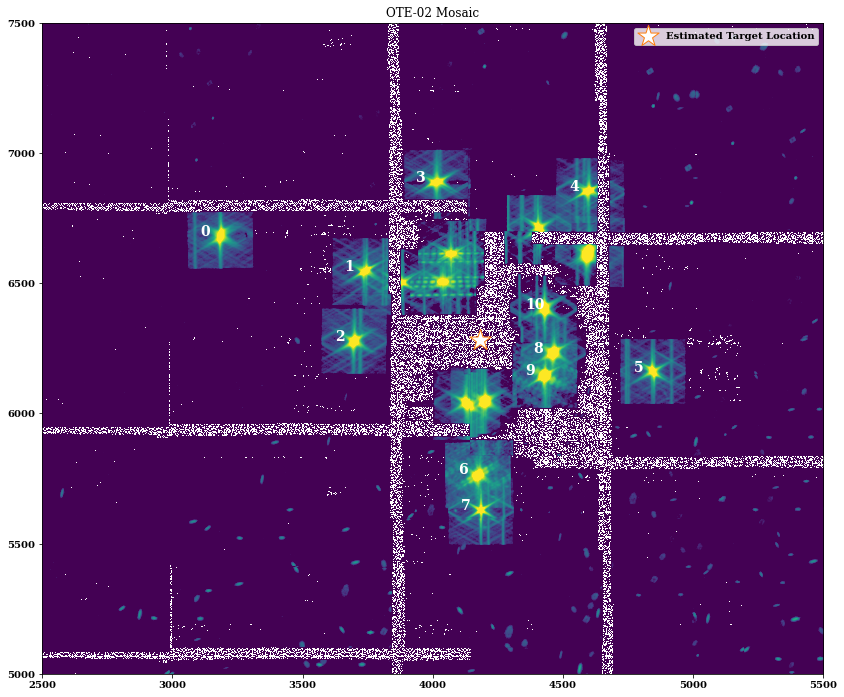

In [61]:
# Zoom in on the identified PSFs
notebook_utils.plot_mosaic_with_psfs(ote01_image, 
                                     car, 
                                     ote01_df['x'].values, 
                                     ote01_df['y'].values, 
                                     ote01_target_location, 
                                     xlim=xlim, 
                                     ylim=ylim
                                    )

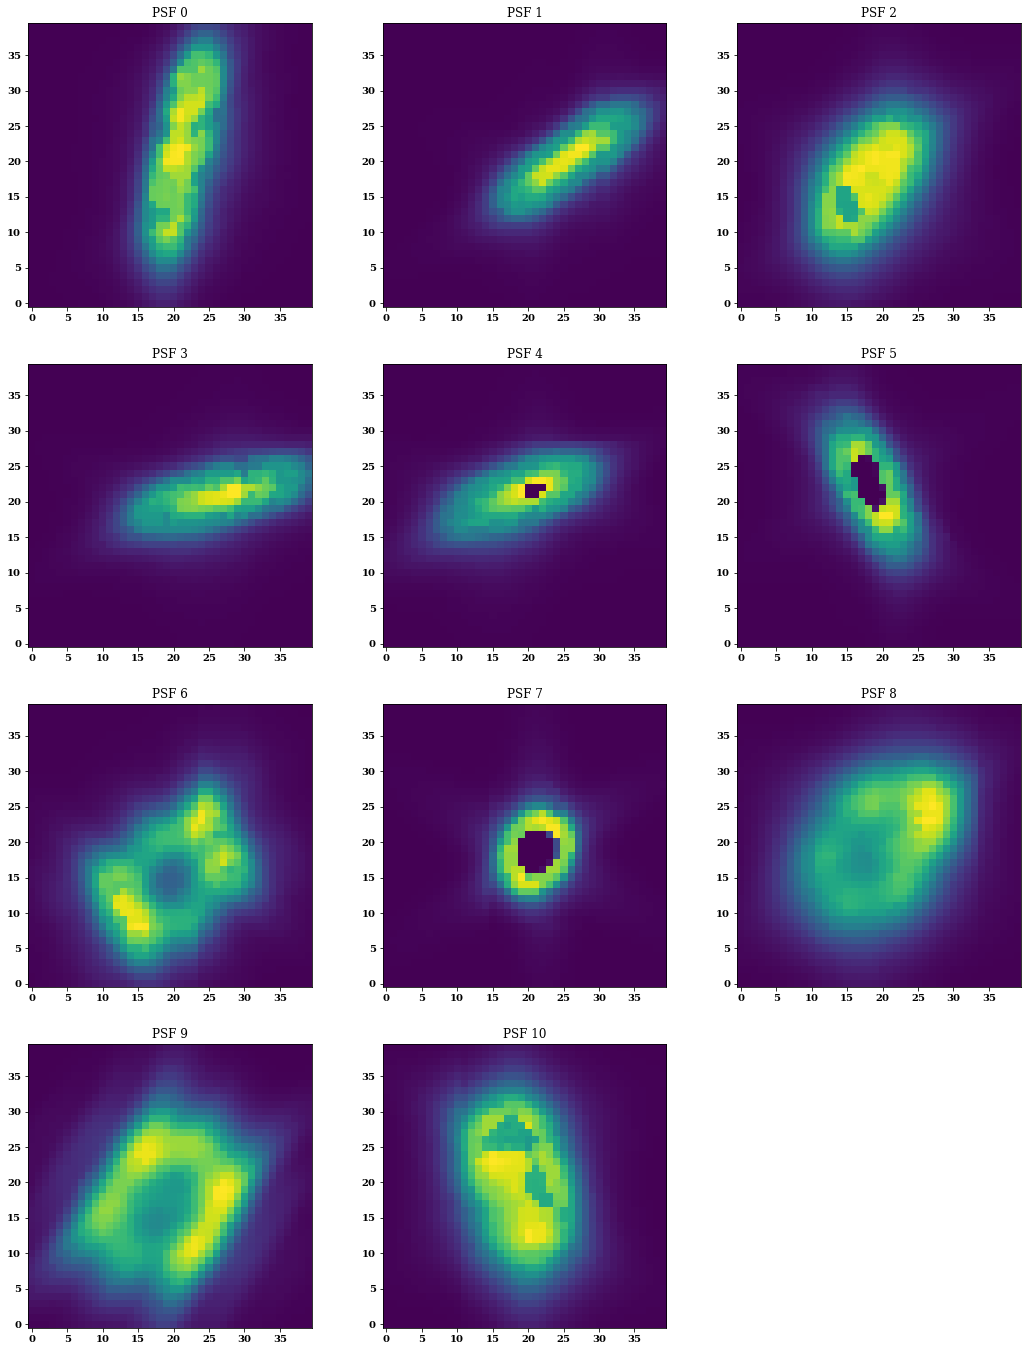

In [62]:
# Cut out each segment and do a visual check
# Change the size of the postage stamp cut out, by adjusting the window_size value 
#  which is the size of one side of the postage stamp
notebook_utils.plot_each_identified_segment_psf(ote01_image, 
                                                ote01_df['x'].values, 
                                                ote01_df['y'].values, 
                                                window_size=40, 
                                                num_psf_per_row=3)

<font color='SlateBlue'> <div>

### Things to look for:    
 
</div></font>


- How many segment PSFs are saturated (zeros in the center of the PSF)?
- Is there a single birght spot in the PSF or are there multiple knots/lobes?


<font color='Tomato'> <div><center>    
## Update the next cell (only) as needed   
</center></div></font>

In [23]:
# Which PSFs (list their number from the plots) would you consider guidable based on a visual inspection?
by_eye_good_inds = [1, 3, 4, 5, 7]

## Look at FWHM and Ellipticty values provided by Shadow 

### First look at FWHM and Ellipticity 

For FWHM the smaller the number, the more compact the PSF, however we have to look at the FWHM x and FWHM y and the ellipticity numbers in order to be able to determine if the PSF is more circular or stretched out in one direction.

We are considering FWHM < 15 to be a "good" FWHM. 

We are considering a ellipse value > 0.4 to be a "good" ellipticity. 

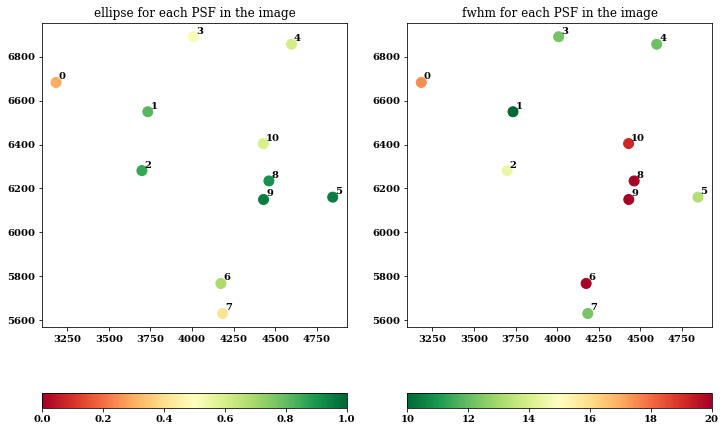

In [226]:
notebook_utils.plot_multiple_parameters(['fwhm', 'ellipse'], ote01_df)

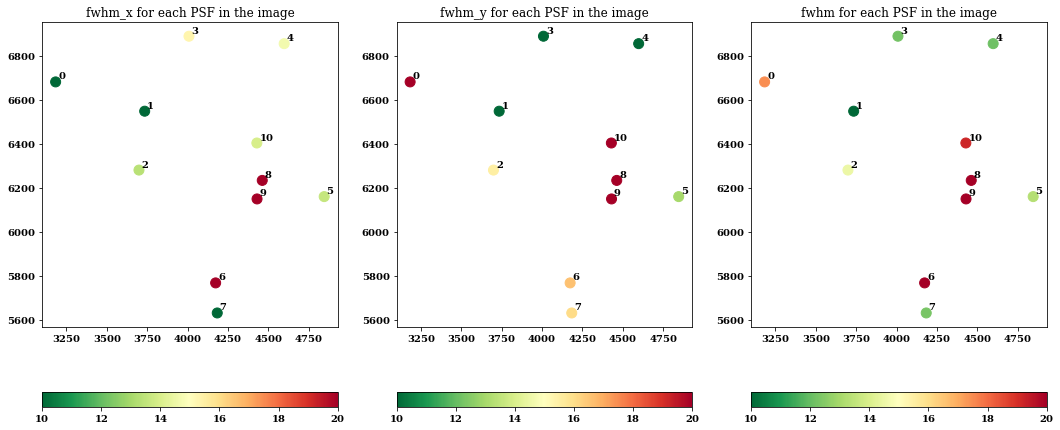

In [227]:
# Look at FWHM x and y (though the images should tell you the same information)
notebook_utils.plot_multiple_parameters(['fwhm_x', 'fwhm_y', 'fwhm'], ote01_df)

Tally up how many of the above PSFs that are in the green for both FWHM and ellipse: 5 

### Using FWHM and Ellipticity, find best PSFs 

In [75]:
# Indices of the better PSFs: 
# Change these values as needed
fwhm_limit = 15
ellipse_limit = 0.5

good_inds = []
for key in ote01_dictionary.keys():
    if ote01_dictionary[key]['fwhm'] < fwhm_limit and \
       ote01_dictionary[key]['ellipse'] > ellipse_limit:
        good_inds.append(key)

good_inds

[1, 2, 3, 4, 5]

### Compare "by eye" good PSFs to programmatic good PSFs 

In [39]:
good = list(set(by_eye_good_inds) & set(good_inds))

good

[1, 3, 4, 5]

If the number of "Good" PSFs is more than, or equal to 6, then we can feel confident that we can get a guiding scenario. If it is less than 6, then we will need OTE-03

In [40]:
if len(good) < 6:
    print(f'We only have {len(good_inds)} PSFs that we think are good enough for guiding. We need more than 6.')
else:
    print(f'We have {len(good_inds)} PSFs that we think are good enough for guiding, which might be enough.')

We only have 5 PSFs that we think are good enough for guiding. We need more than 6.


# After OTE 02

*Do the same analysis that you did after OTE-01, just with the image of the partial deployment*

<font color='Tomato'> <div><center>  
## Make sure the following parameters are correct
</center></div></font>

In [66]:
# CAR information
car = 'OTE-02'
program_id = 1135

In [67]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/' #/data/jwst/wss/flight/

# Location of the NRCALL image with most segments
ote02_mosaic = os.path.join(main_directory, f'{car}/output/mosaic0_OTE-02-Obs1+2-SW.fits')

# Location of the file exported from QUIP
# If no file is provided, set variable equal to None
ote02_info_from_shadow = None

# Define location of the target in the image
# If no location is provided, set variable equal to None
ote02_target_location = None

<font color='DodgerBlue'> <div><center>
## Run the following cells without changing them 
</center></div></font>

In [68]:
# Open image
ote02_image = fits.getdata(ote02_mosaic)

# Correct negative pixels
ote02_image = notebook_utils.correct_pixel_values(ote02_image)

In [70]:
# Get PSF characteristics
parameters_to_include = ['x', 'y', 'fwhm', 'fwhm_x', 'fwhm_y', 'ellipse']

ote02_df, \
ote02_target_location = notebook_utils.get_image_information(ote02_image, 
                                                             ote02_info_from_shadow, 
                                                             parameters_to_include, 
                                                             ote02_target_location, 
                                                             smoothing='high')

ote02_dictionary = convert_df_to_dictionary(ote02_df)

ote02_df

Creating the information table from the X and Y values calculated using MAGIC
14 PSFs found


x     y  distance_to_target
0    471   152          962.405840
1    972   152          612.883349
2   1226   441          250.081987
3   1838   596          574.256040
4   1621   598          361.138478
5   2306   608         1038.010597
6   2148   613          880.116470
7   1197   761          104.651804
8   1316   818          138.513537
9   1436   824          214.462118
10   454   898          843.806850
11  1066  1026          396.164107
12   995  1085          484.334595
13  1965  1125          820.658272

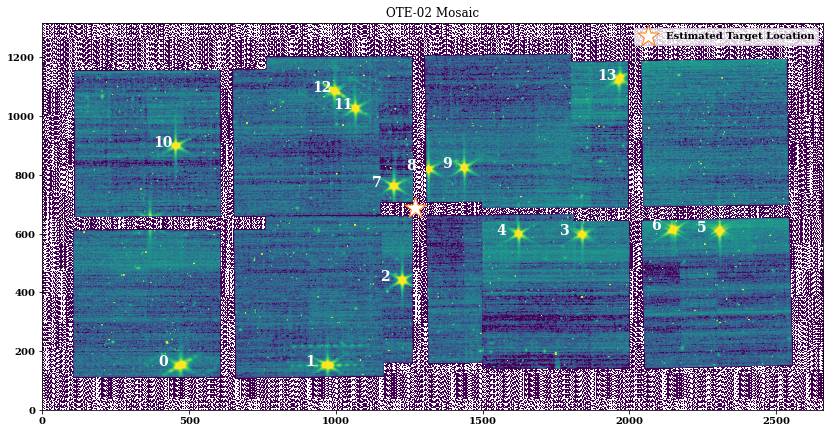

In [71]:
# Plot the full mosaic with the estimated target location and identified PSFs
notebook_utils.plot_mosaic_with_psfs(ote02_image, 
                                     car, 
                                     ote02_df['x'].values, 
                                     ote02_df['y'].values, 
                                     ote02_target_location, 
                                     xlim=None, 
                                     ylim=None 
                                     )

##### Trouble shooting

If you are finding hot pixels instead of PSFs, you can try replacing those pixel values with a positive number close to 0. You can do that with the following code (double click on this cell, then copy and paste the code section into a new cell that can be inserted by using the "+" in the menu at the top of the page):

```
hot_pixel_locations = [(1748, 192), ] # Add more points after the comma, x first, y second
for hot_pix in hot_pixel_locations:
    image[hot_pix[1], hot_pix[0]] = 3e-20
```

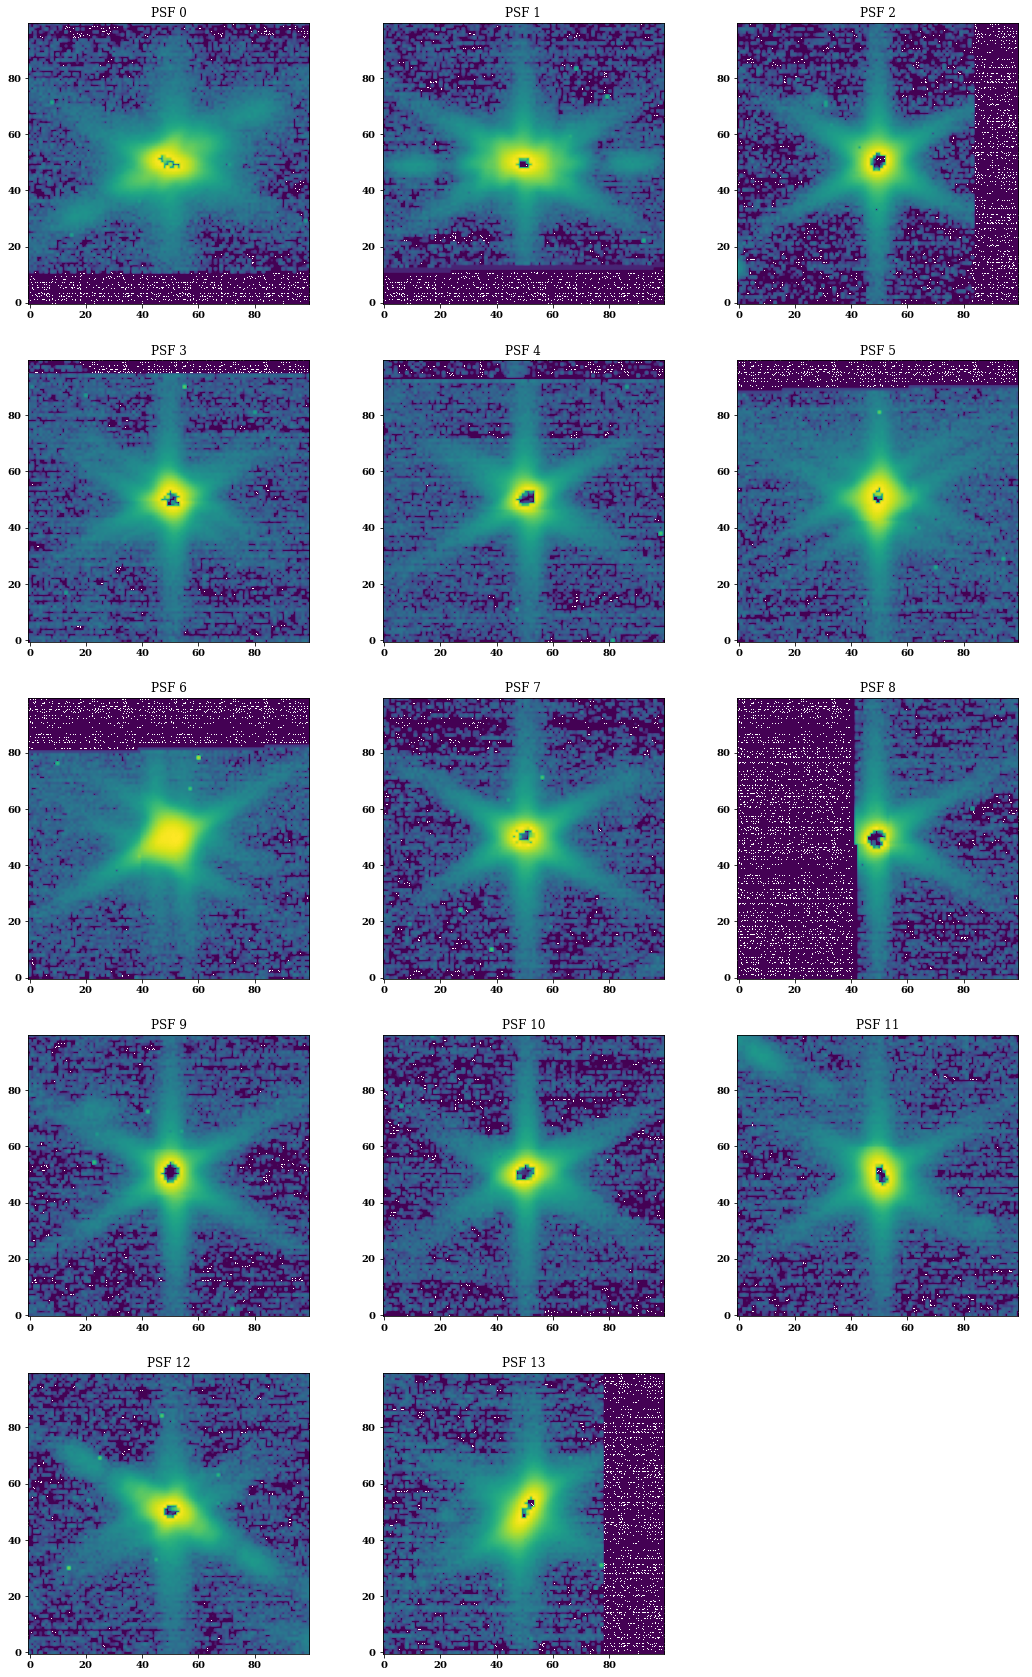

In [122]:
# Cut out each segment and do a visual check
# Change the size of the postage stamp cut out, by adjusting the window_size value which is the size of one side
notebook_utils.plot_each_identified_segment_psf(ote02_image, 
                                                ote02_df['x'].values, 
                                                ote02_df['y'].values, 
                                                window_size=100, 
                                                num_psf_per_row=3)

### Things to look for:
- How many segment PSFs are saturated (zeros in the center of the PSF)?
- Is there a single birght spot in the PSF or are there multiple knots/lobes?


<font color='Tomato'> <div style='background-color: rgba(255, 99, 71, 0.3)'><center> 
##    
## Update the next cell (only) as needed
##    
</center></div></font>

In [73]:
# Which PSFs (list their number from the plots) would you consider guidable based on a visual inspection?
by_eye_good_inds = [0, 2, 3, 4, 7, 8, 9, 10, 11, 12]

## If provided, look at values provided by Shadow 

### First look at FWHM and Ellipticity 

In [223]:
notebook_utils.plot_multiple_parameters(['fwhm', 'ellipse'], ote02_df)

['x', 'y', 'distance_to_target']
Requested parameters are not in the povided dictionary. Nothing to plot


Tally up how many of the above PSFs that are in the green for both FWHM and ellipse: 5 

In [76]:
# Indices of the better PSFs: 
# Change these values as needed
fwhm_limit = 15
ellipse_limit = 0.4 

parameters = set(['fwhm', 'ellipse']) & set(ote02_dictionary.keys())
if not parameters:
    print('Nothing to compare. Relying on by-eye analysis')
    good_inds = by_eye_good_inds
else:
    good_inds = []
    for key in ote02_dictionary.keys():
        if ote02_dictionary[key]['fwhm'] < fwhm_limit and \
           ote02_dictionary[key]['ellipse'] > ellipse_limit:
            good_inds.append(key)


Nothing to compare. Relying on by-eye analysis


### Compare "by eye" good PSFs to programmatic good PSFs 

In [77]:
good = list(set(by_eye_good_inds) & set(good_inds))

good

[0, 2, 3, 4, 7, 8, 9, 10, 11, 12]

If the number of "Good" PSFs is more than, or equal to 6, then we can feel confident that we can get a guiding scenario. If it is less than 6, then we will need OTE-03

In [78]:
if len(good) < 6:
    print(f'We only have {len(good_inds)} PSFs that we think are good enough for guiding. We need more than 6.')
else:
    print(f'We have {len(good_inds)} PSFs that we think are good enough for guiding, which might be enough.')

We have 10 PSFs that we think are good enough for guiding, which might be enough.


# After OTE 03

<font color='Tomato'> <div style='background-color: rgba(255, 99, 71, 0.3)'><center> 
##    
## Make sure the following parameters are correct
##    
</center></div></font>

In [79]:
# CAR information
car = 'OTE-03'
program_id = 1136

In [80]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/'

# Location of the NIRCam images at the best focus
ote03_nrca_images = sorted(glob(os.path.join(main_directory, 
                                             f'{car}/output/jw01136003001_01101_00002_nrca*_cal.fits')))
ote03_nrcb_images = sorted(glob(os.path.join(main_directory, 
                                             f'{car}/output/jw01136003001_01101_00002_nrcb*_cal.fits')))

# Location of the file exported from QUIP
# If no file is provided, set variable equal to None
ote03_info_from_shadow = None

# Define location of the target in the image
# If no location is provided, set variable equal to None
ote03_target_location = None

<font color='DodgerBlue'> <div style='background-color: rgba(30, 144, 255, 0.3)'><center> 
##    
## Run the following cells without changing them
##    
</center></div></font>

Now, we have a better idea of which segment is which, AND we have focus diversity. Here we will be able to match a guess of the PSF in the images we have with their segment name, and then cut that out of the images that we have and put at their GA positions. This prepares us for OTE-07.

In [81]:
# Plot out all all nircam images, and make our own mosiac

# -------------------     -------------------
# |        |        |     |        |        | 
# |   A2   |   A4   |     |   B3   |   B1   |
# |        |        |     |        |        |
# |        |        |     |        |        |
# -------------------     -------------------
# |        |        |     |        |        |
# |   A1   |   A3   |     |   B4   |   B2   |
# |        |        |     |        |        |
# |________|________|     |________|________| 

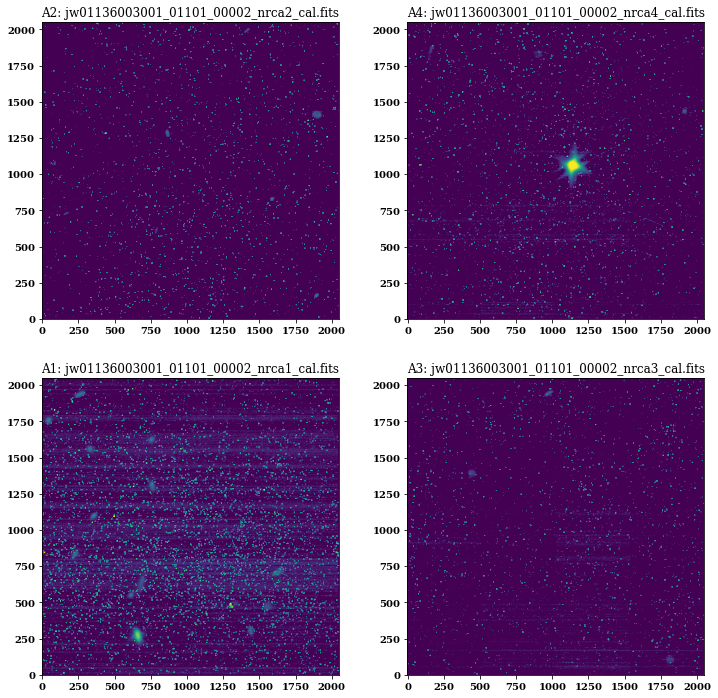

In [82]:
nrca_data_list, nrca_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrca_images)

notebook_utils.plot_nrca_images(nrca_data_list, nrca_name_list)

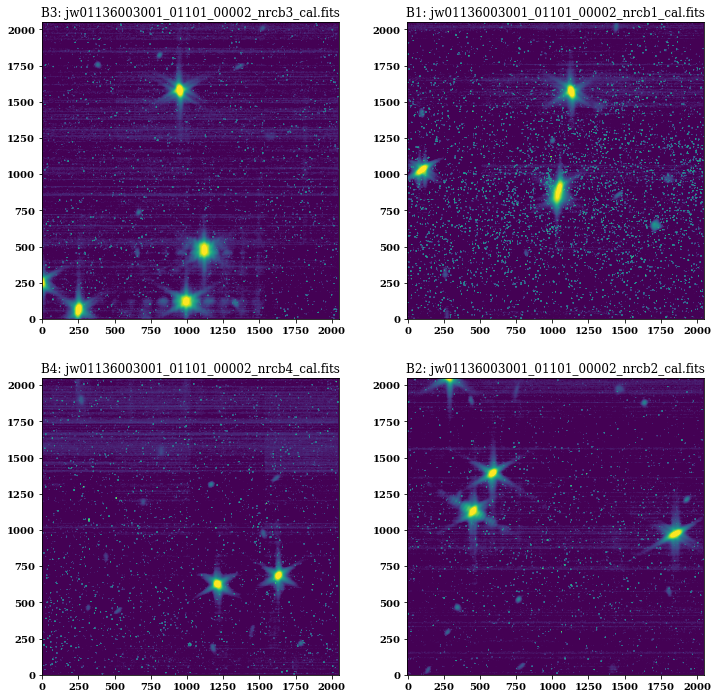

In [83]:
nrcb_data_list, nrcb_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrcb_images)

notebook_utils.plot_nrcb_images(nrcb_data_list, nrcb_name_list)

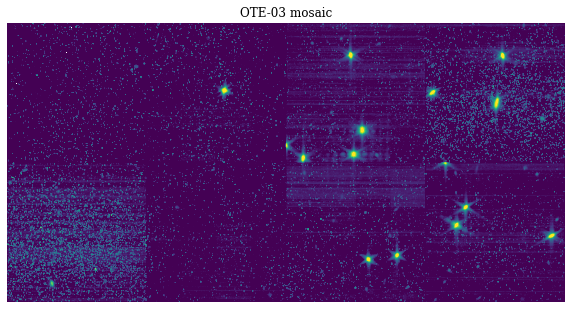

In [86]:
# Make our mosaic
ote03_image = notebook_utils.create_basic_mosaic(nrca_data_list, nrcb_data_list)

plt.figure(figsize=(10,20))
plt.imshow(ote03_image, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
plt.title(f'{car} mosaic')
plt.axis('off')
plt.show()

In [88]:
# Get PSF characteristics
parameters_to_include = ['x', 'y', 'fwhm', 'fwhm_x', 'fwhm_y', 'ellipse']

ote03_df, \
ote03_target_location = notebook_utils.get_image_information(ote03_image, 
                                                             ote03_info_from_shadow, 
                                                             parameters_to_include, 
                                                             ote03_target_location, 
                                                             smoothing='high')

ote03_dictionary = convert_df_to_dictionary(ote03_df)

ote03_df

Creating the information table from the X and Y values calculated using MAGIC
15 PSFs found


x     y  distance_to_target
0   5306   627         1599.140081
1   5726   687         1483.000000
2   7995   973         2565.379114
3   6599  1129         1358.605903
4   6735  1392         1274.113417
5   6436  2035          722.720555
6   4348  2113         1379.178379
7   5090  2170          636.000000
8   4107  2298         1624.052031
9   5215  2524          621.640571
10  7190  2935         1651.823538
11  6248  3077         1046.486025
12  3192  3107         2701.689286
13  7276  3617         2120.450188
14  5045  3625         1606.482493

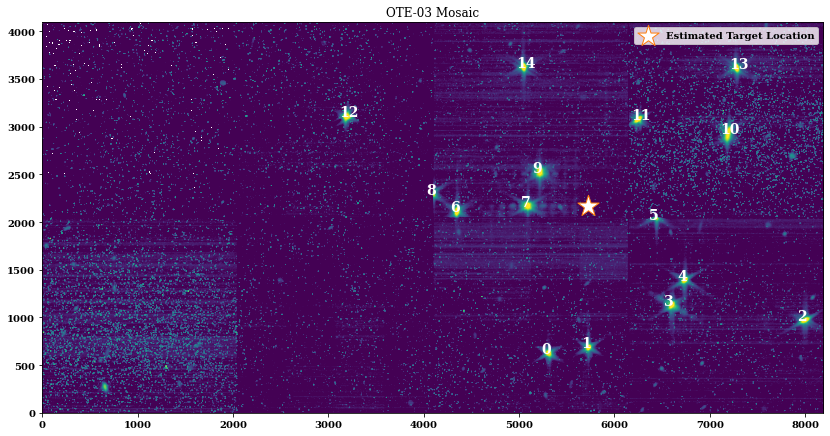

In [92]:
notebook_utils.plot_mosaic_with_psfs(ote03_image, 
                                     car, 
                                     ote03_df['x'].values, 
                                     ote03_df['y'].values, 
                                     est_target_location=ote03_target_location, 
                                     xlim=None, 
                                     ylim=None
                                    )

<font color='Tomato'> <div><center>    
## Make sure the following parameters are correct   
</center></div></font>

In [231]:
# With the help of Shadow, determine which of the labelled PSFs are associated with a 
#  segment. In the dictionary below, put the number from above BEFORE the ":" for each 
#  segment where Shadow thinks we have a match. 

# Delete any entries where the segment is unknown

matching_dictionary = { 7  :'A1-1', 
#                            :'A2-2', 
                        6  :'A3-3', 
                        0  :'A4-4', 
                        4  :'A5-5', 
                        10 :'A6-6', 
                        9  :'B1-7',
                        13 :'B2-9', 
                        14 :'B3-11', 
                        1  :'B4-13', 
                        2  :'B5-15', 
#                         :'B6-17', 
#                         :'C1-8', 
#                         :'C2-10', 
                         3 :'C3-12', 
                        11 :'C4-14', 
#                         :'C5-16', 
#                          :'C6-18'
                      } 


In [233]:
# TODO: sort dictionary in order of key (index)
{k:v for k,v in sorted(matching_dictionary.items(), key=lambda item: item[1])}

{7: 'A1-1',
 6: 'A3-3',
 0: 'A4-4',
 4: 'A5-5',
 10: 'A6-6',
 9: 'B1-7',
 13: 'B2-9',
 14: 'B3-11',
 1: 'B4-13',
 2: 'B5-15',
 3: 'C3-12',
 11: 'C4-14'}

In [209]:
ote03_dictionary


{0: {'x': 5306, 'y': 627, 'distance_to_target': 1599.1400814187605},
 1: {'x': 5726, 'y': 687, 'distance_to_target': 1483.0},
 2: {'x': 7995, 'y': 973, 'distance_to_target': 2565.379114283111},
 3: {'x': 6599, 'y': 1129, 'distance_to_target': 1358.6059031227562},
 4: {'x': 6735, 'y': 1392, 'distance_to_target': 1274.1134172435357},
 5: {'x': 6436, 'y': 2035, 'distance_to_target': 722.7205545714056},
 6: {'x': 4348, 'y': 2113, 'distance_to_target': 1379.1783786008248},
 7: {'x': 5090, 'y': 2170, 'distance_to_target': 636.0},
 8: {'x': 4107, 'y': 2298, 'distance_to_target': 1624.0520311861933},
 9: {'x': 5215, 'y': 2524, 'distance_to_target': 621.6405713915398},
 10: {'x': 7190, 'y': 2935, 'distance_to_target': 1651.8235377908863},
 11: {'x': 6248, 'y': 3077, 'distance_to_target': 1046.486024751406},
 12: {'x': 3192, 'y': 3107, 'distance_to_target': 2701.6892863540024},
 13: {'x': 7276, 'y': 3617, 'distance_to_target': 2120.450188049698},
 14: {'x': 5045, 'y': 3625, 'distance_to_target':

In [175]:
# Match the location to the segment based on the matching dictionary
# This dictionary will ONLY include the PSFs that you have a segment ID for
seg_location_dictionary = notebook_utils.match_psf_params_to_segment(ote03_dictionary, 
                                                                     matching_dictionary)

seg_location_dictionary

{'A1-1': {'x': 5090, 'y': 2170, 'distance_to_target': 636.0},
 'A3-3': {'x': 4348, 'y': 2113, 'distance_to_target': 1379.1783786008248},
 'A4-4': {'x': 5306, 'y': 627, 'distance_to_target': 1599.1400814187605},
 'A5-5': {'x': 6735, 'y': 1392, 'distance_to_target': 1274.1134172435357},
 'A6-6': {'x': 7190, 'y': 2935, 'distance_to_target': 1651.8235377908863},
 'B1-7': {'x': 5215, 'y': 2524, 'distance_to_target': 621.6405713915398},
 'B2-9': {'x': 7276, 'y': 3617, 'distance_to_target': 2120.450188049698},
 'B3-11': {'x': 5045, 'y': 3625, 'distance_to_target': 1606.4824929018057},
 'B4-13': {'x': 5726, 'y': 687, 'distance_to_target': 1483.0},
 'B5-15': {'x': 7995, 'y': 973, 'distance_to_target': 2565.379114283111},
 'C3-12': {'x': 6599, 'y': 1129, 'distance_to_target': 1358.6059031227562},
 'C4-14': {'x': 6248, 'y': 3077, 'distance_to_target': 1046.486024751406}}

In [211]:
ote03_dictionary2 = notebook_utils.add_segment_to_dict(ote03_dictionary, matching_dictionary)

In [212]:
ote03_dictionary2

{0: {'x': 5306,
  'y': 627,
  'distance_to_target': 1599.1400814187605,
  'seg_id': 'A4-4'},
 1: {'x': 5726, 'y': 687, 'distance_to_target': 1483.0, 'seg_id': 'B4-13'},
 2: {'x': 7995,
  'y': 973,
  'distance_to_target': 2565.379114283111,
  'seg_id': 'B5-15'},
 3: {'x': 6599,
  'y': 1129,
  'distance_to_target': 1358.6059031227562,
  'seg_id': 'C3-12'},
 4: {'x': 6735,
  'y': 1392,
  'distance_to_target': 1274.1134172435357,
  'seg_id': 'A5-5'},
 5: {'x': 6436,
  'y': 2035,
  'distance_to_target': 722.7205545714056,
  'seg_id': None},
 6: {'x': 4348,
  'y': 2113,
  'distance_to_target': 1379.1783786008248,
  'seg_id': 'A3-3'},
 7: {'x': 5090, 'y': 2170, 'distance_to_target': 636.0, 'seg_id': 'A1-1'},
 8: {'x': 4107,
  'y': 2298,
  'distance_to_target': 1624.0520311861933,
  'seg_id': None},
 9: {'x': 5215,
  'y': 2524,
  'distance_to_target': 621.6405713915398,
  'seg_id': 'B1-7'},
 10: {'x': 7190,
  'y': 2935,
  'distance_to_target': 1651.8235377908863,
  'seg_id': 'A6-6'},
 11: {'x'

In [ ]:
convert_df_to_dictionary(ote03_df)

In [204]:
ote03_df

x     y  distance_to_target
0   5306   627         1599.140081
1   5726   687         1483.000000
2   7995   973         2565.379114
3   6599  1129         1358.605903
4   6735  1392         1274.113417
5   6436  2035          722.720555
6   4348  2113         1379.178379
7   5090  2170          636.000000
8   4107  2298         1624.052031
9   5215  2524          621.640571
10  7190  2935         1651.823538
11  6248  3077         1046.486025
12  3192  3107         2701.689286
13  7276  3617         2120.450188
14  5045  3625         1606.482493

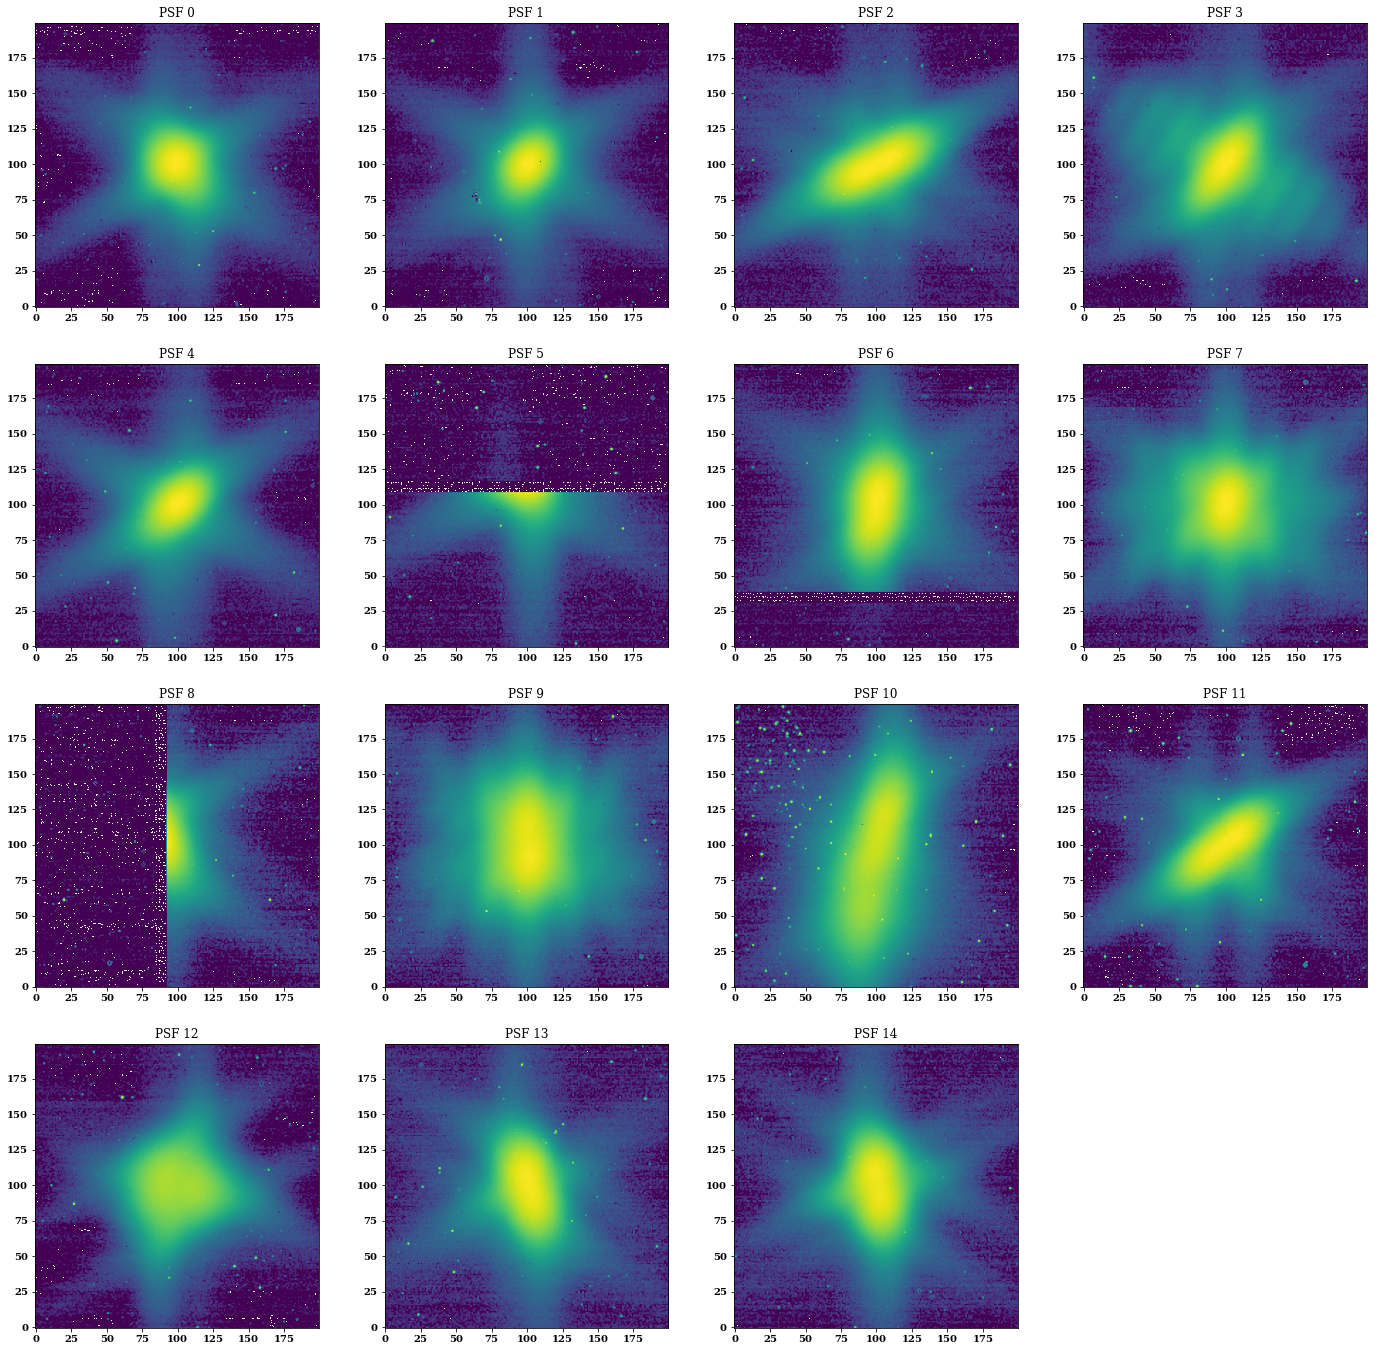

In [132]:
# Cut out each segment and do a visual check
# Change the size of the postage stamp cut out, by adjusting the window_size value which is the size of one side
notebook_utils.plot_each_identified_segment_psf(ote03_image, 
                                                ote03_df['x'].values, 
                                                ote03_df['y'].values, 
                                                seg_list
                                                window_size=200, 
                                                num_psf_per_row=4)

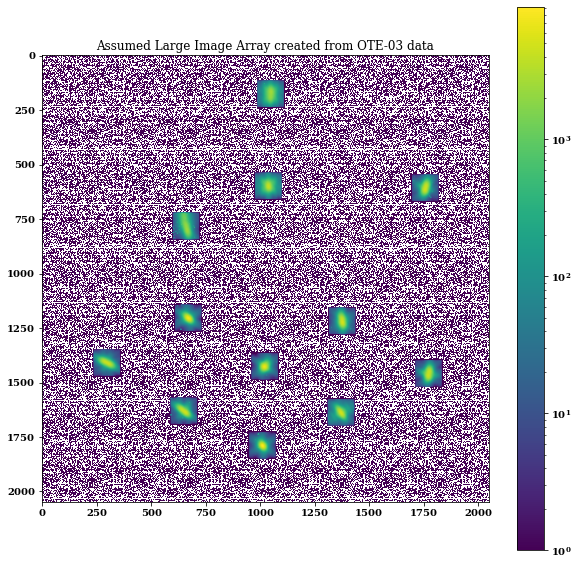

In [176]:
# Put known segment postage stamps in large image array locations
ote03_large_image_array, ga_xs, ga_ys = notebook_utils.create_image_array(ote03_image, 
                                                                          seg_location_dictionary, 
                                                                          window_size=60)

# Plot out new image with distance color coded by how far from boresight
plt.figure(figsize=(10, 10))
plt.imshow(ote03_large_image_array, norm=LogNorm(vmin=1), origin='upper')
plt.title(f"Assumed Large Image Array created from {car} data")
plt.colorbar()
plt.show()

### Plot heat map of distances from estimated target location 

dict_keys(['A1-1', 'A3-3', 'A4-4', 'A5-5', 'A6-6', 'B1-7', 'B2-9', 'B3-11', 'B4-13', 'B5-15', 'C3-12', 'C4-14'])
0 distance_to_target


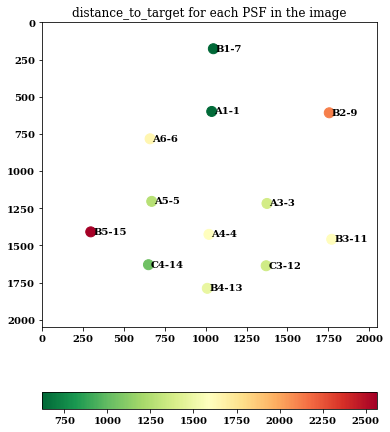

In [202]:
# Look at high level numbers
notebook_utils.plot_multiple_parameters(['distance_to_target', 'fwhm', 'ellipticity'], 
                                        seg_location_dictionary, xs=ga_xs, ys=ga_ys,
                                        xlim=(0,2048), ylim=(2048, 0))

In [203]:
# Break down the FWHM further
notebook_utils.plot_multiple_parameters(['fwhm', 'fwhm_x', 'fwhm_y'], seg_location_dictionary, ga_xs, ga_ys)

Requested parameters are not in dictionary. Nothing to plot


# After OTE 04

In [1]:
# CAR information
car = 'OTE-04'
program_id = 1137

# After OTE 06

In [3]:
# CAR information
car = 'OTE-06'
program_id = 1140

# Get simulated NIRCam locations of LOS-02 PSFs 

In [141]:
los02_image = fits.getdata('/ifs/jwst/tel/LRE5/LOS-02/output/LRE5-RfR/jw01410002001_02101_00001_nrca3_cal.fits')

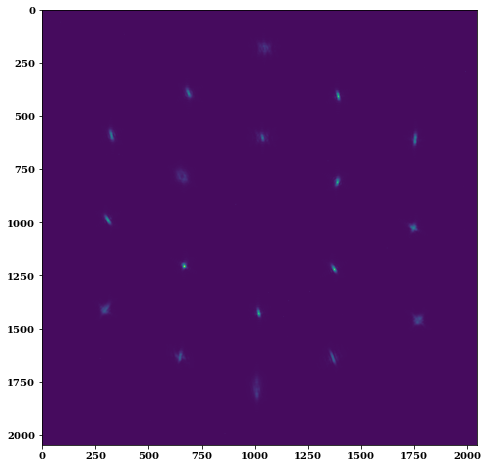

In [142]:
plt.figure(figsize=(10, 8))
plt.imshow(los02_image)

In [161]:
# mapping of magic segment labels to WSS numbers

# Do not change this cell

SEGMENT_MAP_SCI = ["B1-7",  "C6-18", "C1-8",  "B6-17",
                   "A1-1",  "B2-9",  "A6-6",  "A2-2", 
                   "C5-16", "C2-10", "A5-5",  "A3-3", 
                   "B5-15", "A4-4",  "B3-11", "C4-14", 
                   "C3-12", "B4-13"]




In [152]:
x_list, y_list = notebook_utils.get_position_from_magic(los02_image, 
                                                        smoothing='high', 
                                                        npeaks=np.inf)

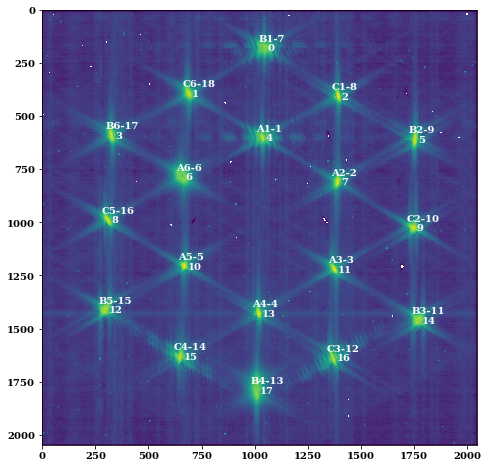

In [160]:
plt.figure(figsize=(10, 8))
plt.imshow(los02_image, norm=LogNorm(vmin=1))
for i, (seg, x, y) in enumerate(zip(SEGMENT_MAP_SCI, x_list, y_list)):
    plt.annotate(i, (x, y), (x+15, y+15), color='white' )
    plt.annotate(seg, (x, y), (x-30, y-30), color='white' )

In [165]:
all_psfs_table = pd.DataFrame({'segment':SEGMENT_MAP_SCI, 'x':x_list, 'y':y_list, })

all_psfs_table

segment     x     y
0     B1-7  1047   177
1    C6-18   690   391
2     C1-8  1394   404
3    B6-17   327   589
4     A1-1  1037   599
5     B2-9  1756   608
6     A6-6   660   783
7     A2-2  1391   808
8    C5-16   309   987
9    C2-10  1748  1024
10    A5-5   670  1204
11    A3-3  1375  1218
12   B5-15   297  1409
13    A4-4  1020  1426
14   B3-11  1771  1459
15   C4-14   650  1630
16   C3-12  1370  1637
17   B4-13  1010  1789

In [166]:
truth_locations = all_psfs_table.set_index('segment').T.to_dict('list')
truth_locations

{'B1-7': [1047, 177],
 'C6-18': [690, 391],
 'C1-8': [1394, 404],
 'B6-17': [327, 589],
 'A1-1': [1037, 599],
 'B2-9': [1756, 608],
 'A6-6': [660, 783],
 'A2-2': [1391, 808],
 'C5-16': [309, 987],
 'C2-10': [1748, 1024],
 'A5-5': [670, 1204],
 'A3-3': [1375, 1218],
 'B5-15': [297, 1409],
 'A4-4': [1020, 1426],
 'B3-11': [1771, 1459],
 'C4-14': [650, 1630],
 'C3-12': [1370, 1637],
 'B4-13': [1010, 1789]}

In [169]:
truth_locations == notebook_utils.GA_PSF_LOCATIONS

True